In [1]:
pip install transformers


     |████████████████████████████████| 3.8 MB 4.3 MB/s 
     |████████████████████████████████| 77 kB 8.5 MB/s 
     |████████████████████████████████| 596 kB 90.5 MB/s 
     |████████████████████████████████| 895 kB 68.6 MB/s 
     |████████████████████████████████| 6.5 MB 63.0 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [2]:
from torch import cuda
device = 'cuda' if cuda.is_available() else 'cpu'
print(device)

cuda


In [3]:
from transformers import AutoModelForSequenceClassification,RobertaTokenizer
model = AutoModelForSequenceClassification.from_pretrained("/content/drive/MyDrive/Equintel_Uma/Trained_Models/senti-model-05_04_22")

In [4]:
tokenizer=RobertaTokenizer.from_pretrained("/content/drive/MyDrive/Equintel_Uma/Trained_Models/senti-model-05_04_22")

Validate the model using a validation dataset

In [5]:
import pandas as pd
val = pd.read_excel("/content/drive/MyDrive/Equintel_Uma/Data/Validation_dataset_67K.xlsx")
val = val.drop('Unnamed: 0', axis = 1)
val.shape

(1927, 2)

In [6]:
val_texts = list(val['title'])
val_labels = list(val[' sentiment'])

In [7]:
import torch

class createDatasetObject(torch.utils.data.Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx])
        return item

    def __len__(self):
        return len(self.labels)

In [8]:
val_encodings = tokenizer(val_texts, truncation=True, padding=True,return_tensors='pt')
val_dataset = createDatasetObject(val_encodings, val_labels)

In [9]:
print(val_encodings)

{'input_ids': tensor([[    0, 14438,  8132,  ...,     1,     1,     1],
        [    0,  6949,   771,  ...,     1,     1,     1],
        [    0, 22886, 45852,  ...,     1,     1,     1],
        ...,
        [    0,   574,  2001,  ...,     1,     1,     1],
        [    0,  8481,   208,  ...,     1,     1,     1],
        [    0, 43753,   368,  ...,     1,     1,     1]]), 'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0]])}


Predict using the finetuned model

In [10]:
from torch.nn import functional as F
with torch.no_grad():
  outputs = model(**val_encodings)
  predictions = F.softmax(outputs.logits,dim = 1)
  print(predictions)

tensor([[0.4424, 0.5576],
        [0.4424, 0.5576],
        [0.7667, 0.2333],
        ...,
        [0.4424, 0.5576],
        [0.4424, 0.5576],
        [0.4424, 0.5576]])


In [11]:
labels = torch.argmax(predictions, dim =1)
print(labels)

tensor([1, 1, 0,  ..., 1, 1, 1])


Predict using the pipeline classifier 

In [ ]:
from transformers import pipeline
classifier = pipeline(task='sentiment-analysis', model=model, tokenizer=tokenizer)

In [ ]:
predicted_output_from_model = []
for str in val_texts: 
  predicted_output_from_model.append(classifier(str))  

In [ ]:
print(predicted_output_from_model)

[[{'label': 'POSITIVE', 'score': 0.5035553574562073}], [{'label': 'POSITIVE', 'score': 0.5036314725875854}], [{'label': 'POSITIVE', 'score': 0.5035411715507507}], [{'label': 'POSITIVE', 'score': 0.5035366415977478}], [{'label': 'POSITIVE', 'score': 0.5036314129829407}], [{'label': 'POSITIVE', 'score': 0.5035472512245178}], [{'label': 'POSITIVE', 'score': 0.5035374760627747}], [{'label': 'POSITIVE', 'score': 0.5036188364028931}], [{'label': 'POSITIVE', 'score': 0.5036332607269287}], [{'label': 'POSITIVE', 'score': 0.5035408735275269}], [{'label': 'POSITIVE', 'score': 0.5035749673843384}], [{'label': 'POSITIVE', 'score': 0.5036339163780212}], [{'label': 'POSITIVE', 'score': 0.5035421848297119}], [{'label': 'POSITIVE', 'score': 0.5035494565963745}], [{'label': 'POSITIVE', 'score': 0.5035430788993835}], [{'label': 'POSITIVE', 'score': 0.5036332607269287}], [{'label': 'POSITIVE', 'score': 0.5035438537597656}], [{'label': 'POSITIVE', 'score': 0.503612220287323}], [{'label': 'POSITIVE', 'scor

In [ ]:
pred_sentiment = []
for row in predicted_output_from_model: 
  if row[0]['label'] == 'POSITIVE':
    pred_sentiment.append(1) 
  else:
    pred_sentiment.append(0)

In [ ]:
print(pred_sentiment)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

**Plot the Confusion Matrix**

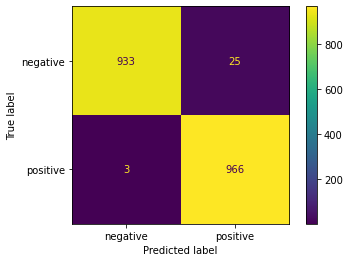

In [12]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
cm=confusion_matrix(val_labels,labels)
cmd = ConfusionMatrixDisplay(cm, display_labels=['negative','positive'])
cmd.plot()